*popt values: (a, b, c, d) 9.415784596491859 6.294984536173773 -20.807822173210006 9.530524946801926
average overall temperature: 9.608956010891246
average hottest temperature: 18.946309540854894
average coldest temperature: 0.11474036213818373
pcov array:
[[ 1.60126809e-02  1.33795854e-04 -2.68936002e-01 -2.27777922e-04]
 [ 1.33795854e-04  1.34791928e-04 -2.70935011e-01  2.01827788e-04]
 [-2.68936002e-01 -2.70935011e-01  5.44586045e+02 -4.05680544e-01]
 [-2.27777922e-04  2.01827788e-04 -4.05680544e-01  8.06908783e-03]]


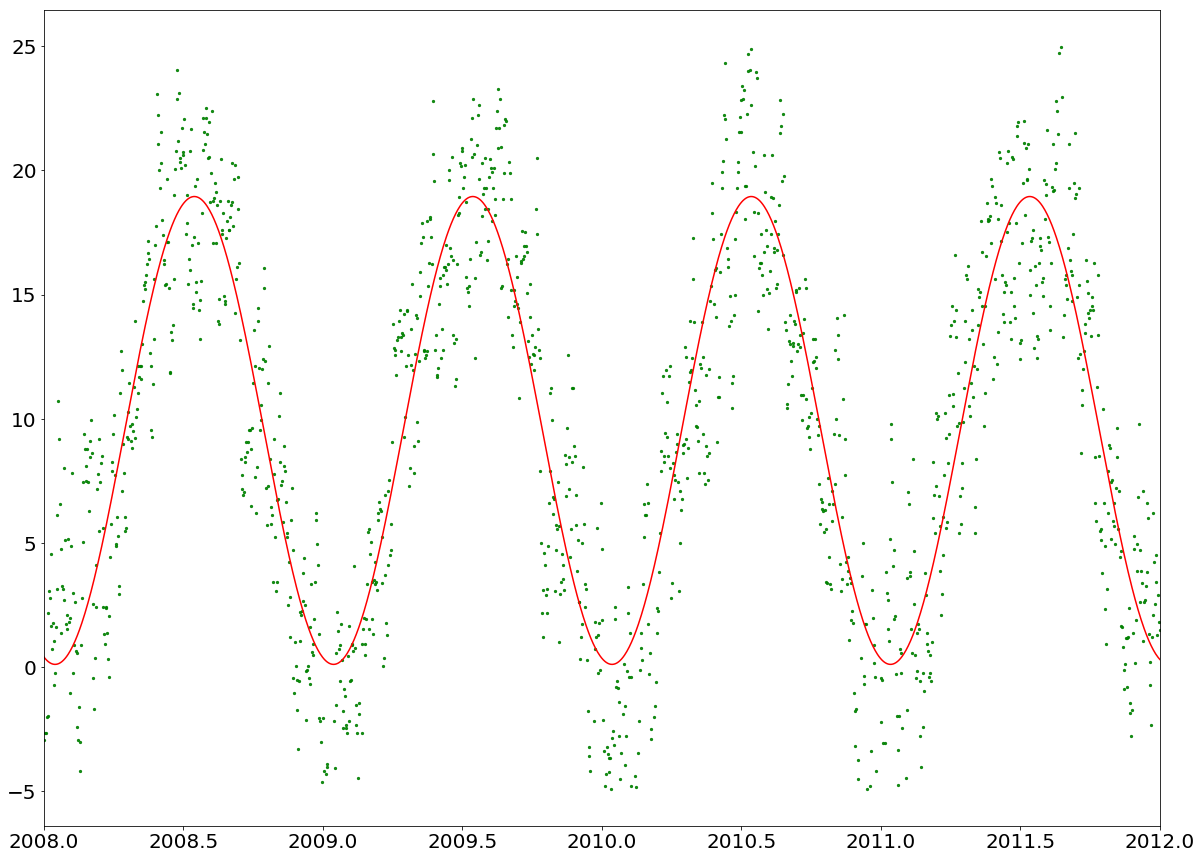

In [3]:
#QUESTION 1
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures.txt")
Date = data[:,0]
Temp = data[:,1]

#time from 2008 to 2012
gd = (Date > 2008)  &\
     (Date < 2012)  &\
    (Temp<25)   &\
    (Temp>-5)
good = np.where(gd)[0]

#find best fit line
popt, pcov = opt.curve_fit(cosfit, Date[good], Temp[good], p0=[10,2*np.pi, np.pi, 10])

#best fit parameters:
print("*popt values: (a, b, c, d)",*popt)

# PLOT TO VERIFY FILE READ IN
fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date[good], Temp[good], s=5,c='g',alpha=0.9)
plt.plot(Date, cosfit(Date, *popt), c='r')

ax1.set_xlim(2008,2012)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

#overall average
over = (Temp<25)   &\
        (Temp>-5)
overall = np.where(over)[0]
print("average overall temperature:", np.mean(Temp[overall]))

#hottest time of the year
hotlist = []
for x in np.arange (2008, 2012, 0.0001):
    hotlist.append(cosfit(x, *popt))
print("average hottest temperature:", max(hotlist))

#coldest time of the year
coldlist = []
for x in np.arange (2008, 2012, 0.0001):
    coldlist.append(cosfit(x, *popt))
print("average coldest temperature:", min(hotlist))

print("pcov array:")
print(pcov)

ColDefs(
    name = 'APSTAR_ID'; format = '45A'
    name = 'TARGET_ID'; format = '34A'
    name = 'ASPCAP_ID'; format = '46A'
    name = 'FILE'; format = '38A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'I'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '140A'
    name = 'SURVEY'; format = '14A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    n

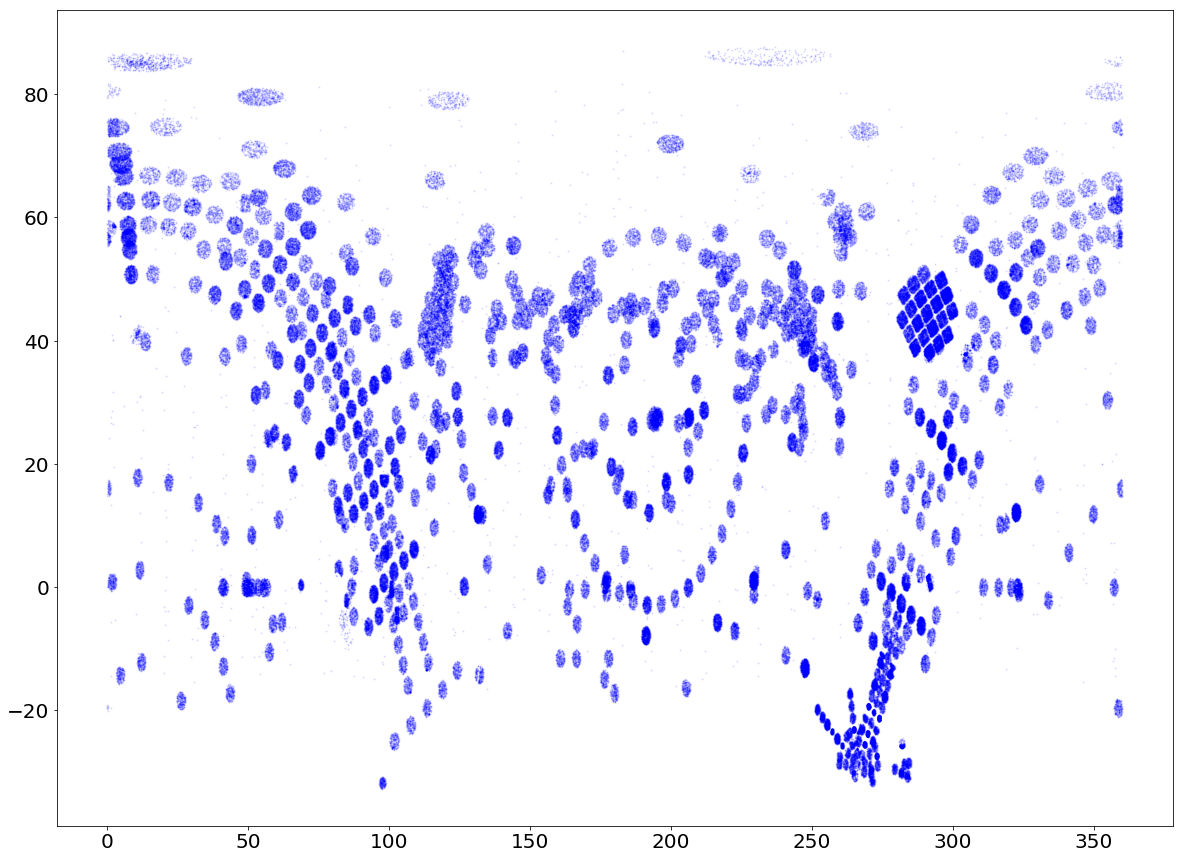

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolean Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['ra'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


[ 2.75869626e+00  2.71841248e-01 -6.90816066e+02 -1.52543925e+01]


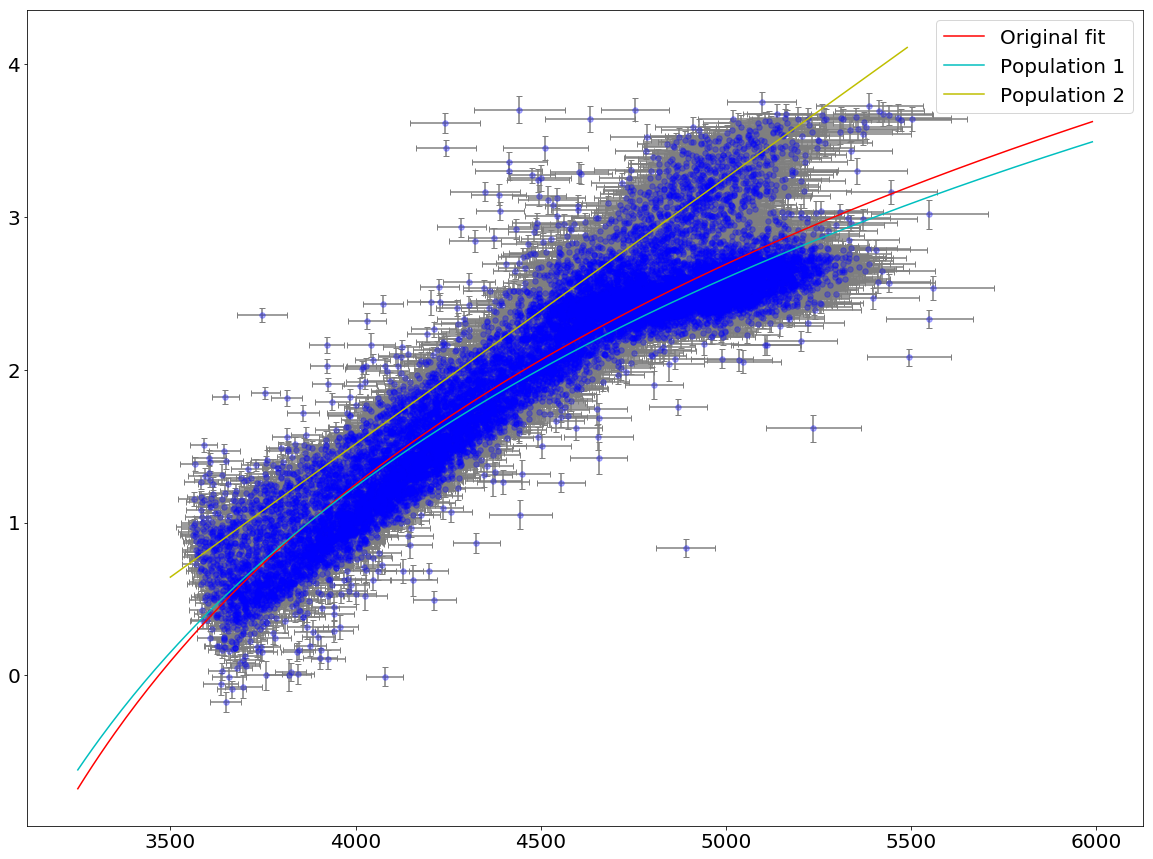

In [50]:
#a Fit TEFF, (TEFF_ERR) vs. LogG (LOGG_ERR); GLAT[-1,1]

#selecting only -1< GLAT < 1 stars with a mask:
a = (star['GLAT'] > -1) &\
    (star['GLAT'] < 1) &\
    (star['TEFF'] < 9999) &\
    (star['TEFF']>-9990) &\
    (star['LOGG']< 9999)&\
    (star['LOGG']>-9990)
amask = np.where(a)[0]

b = (star['GLAT'] > -1) &\
    (star['GLAT'] < 1) &\
    (star['TEFF'] < 9999) &\
    (star['TEFF']>-9990) &\
    (star['LOGG']<9999)&\
    (star['LOGG']>-1) 
bmask = np.where(b)[0]

c = (star['GLAT'] > -1) &\
    (star['GLAT'] < 1) &\
    (star['TEFF'] < 9999) &\
    (star['TEFF']>-9990) &\
    (star['LOGG']< 2.5)&\
    (star['LOGG']>-9990)
cmask = np.where(c)[0]

#fitting
popt, pcov = opt.curve_fit(logfit, star['TEFF'][amask], star['LOGG'][amask])
print(popt)

#population 1
def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

popt1, pcov1 = mcFitLine(star['TEFF'][bmask], star['LOGG'][bmask], star['TEFF_ERR'][bmask], star['LOGG_ERR'][bmask])

#population 2
popt2, pcov2 = opt.curve_fit(logfit, star['TEFF'][cmask], star['LOGG'][cmask])

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][amask],star['LOGG'][amask],s=30,c='b',alpha=0.3)
ax.errorbar(star['TEFF'][amask],star['LOGG'][amask], xerr=star['TEFF_ERR'][amask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
ax.errorbar(star['TEFF'][amask],star['LOGG'][amask], yerr=star['LOGG_ERR'][amask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)

xdata = np.arange(3250,6000,10)
plt.plot(xdata, logfit(xdata, *popt), c='r', label='Original fit')
plt.plot(xdata, logfit(xdata, *popt2), c='c', label='Population 1')

xdata = np.arange(3500,5500,10)
plt.plot(xdata, linear(xdata, *popt1)*1.2, c='y', label='Population 2')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

plt.legend(loc='best', fontsize=20)
plt.show()

[0.017807728087371015, -0.022301796642609586, -0.261132014894539, 0.04711571573512311]


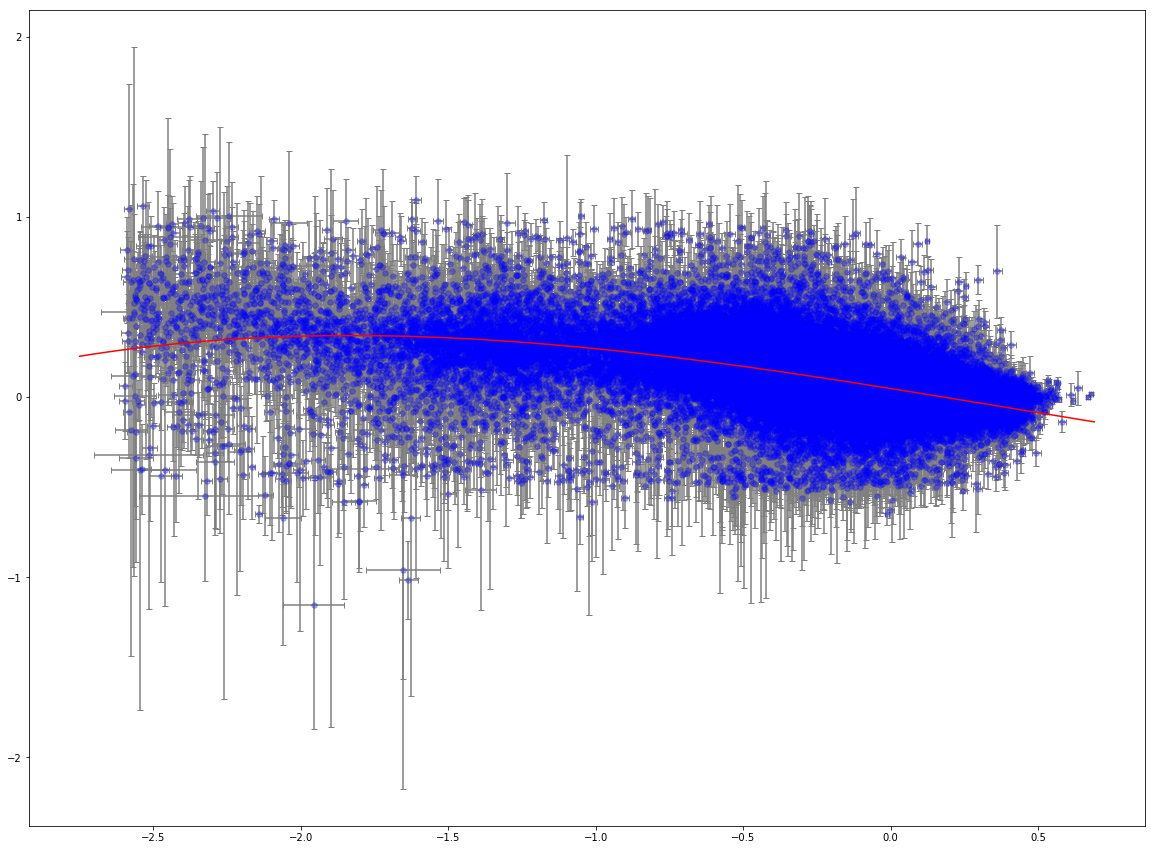

In [52]:
#b fit, Fe_H (Fe_H_ERR) vs. O_FE (O_FE_ERR); GLAT<-10 or GLAT>10
#NEED TO FIT 
qb =(star['Fe_H'] < 9999) &\
    (star['Fe_H']>-9990) &\
    (star['O_FE']< 9999)&\
    (star['O_FE']>-9990) &\
    (star['GLAT'] < -10) 
partbmask = np.where(qb)[0]

qb1 =(star['Fe_H'] < 9999) &\
    (star['Fe_H']>-9990) &\
    (star['O_FE']< 9999)&\
    (star['O_FE']>-9990) &\
    (star['GLAT'] > 10)
partbmask1 = np.where(qb1)[0]


#fitting
def mcFit4paramb(function, x3, y3, x3_err, y3_err, guess):
    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(function, x3_adj, y3_adj, p0=guess)
        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]

#poptb, pcovb = mcFit4paramb(poly3, star['Fe_H'][partbmask], star['O_FE'][partbmask], star['Fe_H_ERR'][partbmask], star['O_FE_ERR'][partbmask], [-.2, .1, .1, 0])
#print(poptb)

poptb1, pcovb1 = mcFit4paramb(poly3, star['Fe_H'][partbmask1], star['O_FE'][partbmask1], star['Fe_H_ERR'][partbmask1], star['O_FE_ERR'][partbmask1], [-.2, .1, .1, 0])
print(poptb1)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][partbmask],star['O_FE'][partbmask],s=30,c='b',alpha=0.3)
ax.scatter(star['Fe_H'][partbmask1],star['O_FE'][partbmask1],s=30,c='b',alpha=0.3)

ax.errorbar(star['Fe_H'][partbmask],star['O_FE'][partbmask], xerr=star['Fe_H_ERR'][partbmask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
ax.errorbar(star['Fe_H'][partbmask1],star['O_FE'][partbmask1], xerr=star['Fe_H_ERR'][partbmask1], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)

ax.errorbar(star['Fe_H'][partbmask],star['O_FE'][partbmask], yerr=star['O_FE_ERR'][partbmask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
ax.errorbar(star['Fe_H'][partbmask1],star['O_FE'][partbmask1], yerr=star['O_FE_ERR'][partbmask1], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)

xdata = np.arange(-2.75,.7,.01)
#plt.plot(xdata, poly3(xdata, *poptb), c='y', label='Original Population')
plt.plot(xdata, poly3(xdata, *poptb1), c='r', label='Second Population')
plt.show()

[0.1277610110165063, 0.23322386389935346, -0.11667349299109095, 0.03301294875543114]
[-0.03164113228837577, 0.2823562103609109]


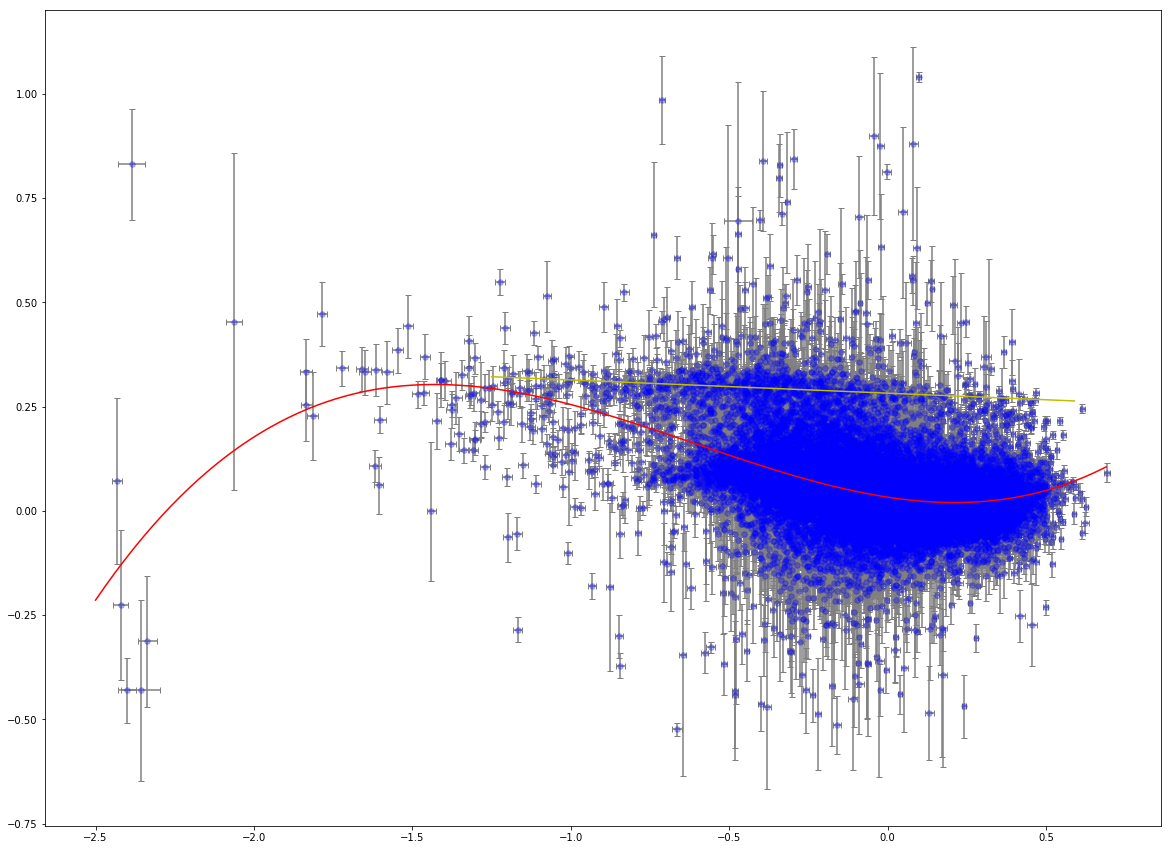

In [38]:
#c fit, Fe_H (Fe_H_ERR) vs. OF_FE (O_FE_ERR) ; GLAT[-2,2]
qc = (star['GLAT'] > -2) &\
    (star['GLAT'] < 2) &\
    (star['Fe_H'] < 9999) &\
    (star['Fe_H']>-9990) &\
    (star['O_FE']< 9999)&\
    (star['O_FE']>-9990)
partcmask = np.where(qc)[0]

qc1 = (star['GLAT'] > -2) &\
    (star['GLAT'] < 2) &\
    (star['Fe_H'] < 0) &\
    (star['Fe_H']>-.7) &\
    (star['O_FE']< .35)&\
    (star['O_FE']>.25)
partc1mask = np.where(qc1)[0]

#fitting
def mcFit4paramc(function, x3, y3, x3_err, y3_err, guess):
    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 100 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(function, x3_adj, y3_adj, p0=guess)
        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]

poptc, pcovc = mcFit4paramc(poly3, star['Fe_H'][partcmask], star['O_FE'][partcmask], star['Fe_H_ERR'][partcmask], star['O_FE_ERR'][partcmask], [1, 1, 1, 1])
print(poptc)

#second population
def mcFitLinec(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

poptc1, pcovc1 = mcFitLinec(star['Fe_H'][partc1mask],star['O_FE'][partc1mask], star['Fe_H_ERR'][partc1mask], star['O_FE_ERR'][partc1mask])
print(poptc1)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][partcmask],star['O_FE'][partcmask],s=30,c='b',alpha=0.3)
ax.errorbar(star['Fe_H'][partcmask],star['O_FE'][partcmask], xerr=star['Fe_H_ERR'][partcmask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
ax.errorbar(star['Fe_H'][partcmask],star['O_FE'][partcmask], yerr=star['O_FE_ERR'][partcmask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
xdata = np.arange(-2.5,.7,.01)
plt.plot(xdata, poly3(xdata, *poptc), c='r', label='Original fit')
xdata = np.arange(-1.25,.6,.01)
plt.plot(xdata, linear(xdata, *poptc1), c='y', label='Second Population')
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


[-0.9059450961704646, 0.7135623332425106, -2114.0814972949784, 7.290078824763828]


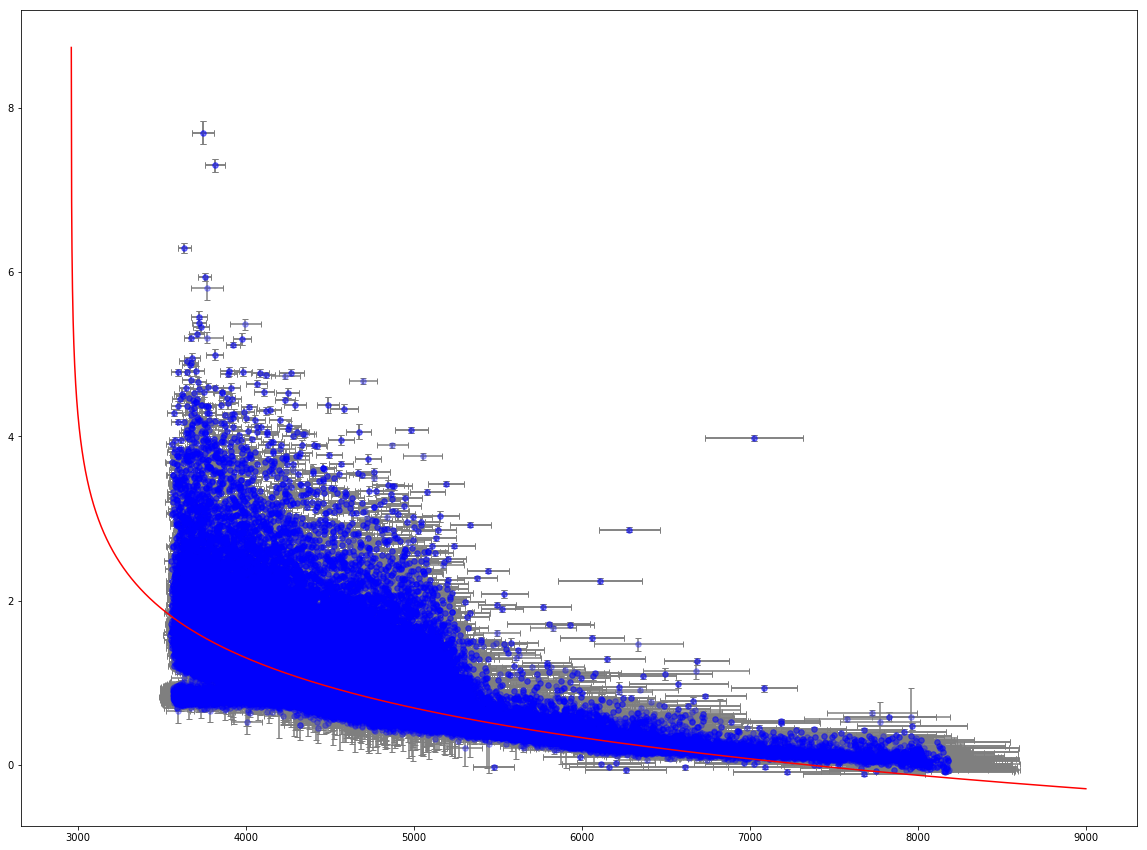

In [48]:
#d fit, TEFF (TEFF_ERR) vs J-K (J_ERR, K_ERR); GLAT<-10 or GLAT>10
qd =(star['TEFF'] < 9999) &\
    (star['TEFF']>-9990) &\
    (star['J']< 9999)&\
    (star['J']>-9990)&\
    (star['K']< 9999)&\
    (star['K']>-9990) &\
    (star['K_ERR']<5)&\
    (star['K_ERR']>-9999)&\
    (star['J_ERR']<5)&\
    (star['J_ERR']>-9999)&\
    (star['GLAT'] > -10)
partdmask = np.where(qd)[0]

qd1 =(star['TEFF'] < 9999) &\
    (star['TEFF']>-9990) &\
    (star['J']< 9999)&\
    (star['J']>-9990)&\
    (star['K']< 9999)&\
    (star['K']>-9990) &\
    (star['K_ERR']<5)&\
    (star['K_ERR']>-9999)&\
    (star['J_ERR']<5)&\
    (star['J_ERR']>-9999)&\
    (star['GLAT'] < 10)
partdmask1 = np.where(qd1)[0]

#fitting
def mcFit4paramd(function, x3, y3, x3_err, y3_err, guess):
    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(function, x3_adj, y3_adj, p0=guess)
        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]

#poptd, pcovd = mcFit4paramd(logfit, star['TEFF'][partdmask],(star['J'][partdmask]-star['K'][partdmask]), star['TEFF_ERR'][partdmask], np.sqrt(((star['J_ERR'][partdmask])**2)+((star['K_ERR'][partdmask])**2)), [-1, 1, 1, 1])
#print(poptd)

poptd1, pcovd1 = mcFit4paramd(logfit, star['TEFF'][partdmask1],(star['J'][partdmask1]-star['K'][partdmask1]), star['TEFF_ERR'][partdmask1], np.sqrt(((star['J_ERR'][partdmask1])**2)+((star['K_ERR'][partdmask1])**2)), [-1, 1, 1, 1])
print(poptd1)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
#first mask
ax.scatter(star['TEFF'][partdmask],(star['J'][partdmask]-star['K'][partdmask]),s=30,c='b',alpha=0.3)
#second
ax.scatter(star['TEFF'][partdmask1],(star['J'][partdmask1]-star['K'][partdmask1]),s=30,c='b',alpha=0.3)

#first mask errors
ax.errorbar(star['TEFF'][partdmask],(star['J'][partdmask]-star['K'][partdmask]), xerr=star['TEFF_ERR'][partdmask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
ax.errorbar(star['TEFF'][partdmask],(star['J'][partdmask]-star['K'][partdmask]), yerr=np.sqrt(((star['J_ERR'][partdmask])**2)+((star['K_ERR'][partdmask])**2)), c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)

#second mask errors
ax.errorbar(star['TEFF'][partdmask1],(star['J'][partdmask1]-star['K'][partdmask1]), xerr=star['TEFF_ERR'][partdmask1], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
ax.errorbar(star['TEFF'][partdmask1],(star['J'][partdmask1]-star['K'][partdmask1]), yerr=np.sqrt(((star['J_ERR'][partdmask1])**2)+((star['K_ERR'][partdmask1])**2)), c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)

xdata = np.arange(-3000,9000,1)
#plt.plot(xdata, logfit(xdata, *poptd), c='r', label='Original fit')
plt.plot(xdata, logfit(xdata, *poptd1), c='r', label='Original fit2')

[45.82014812757612, 0.0318911084601878, -0.512094827461571, -13.748914555376532]


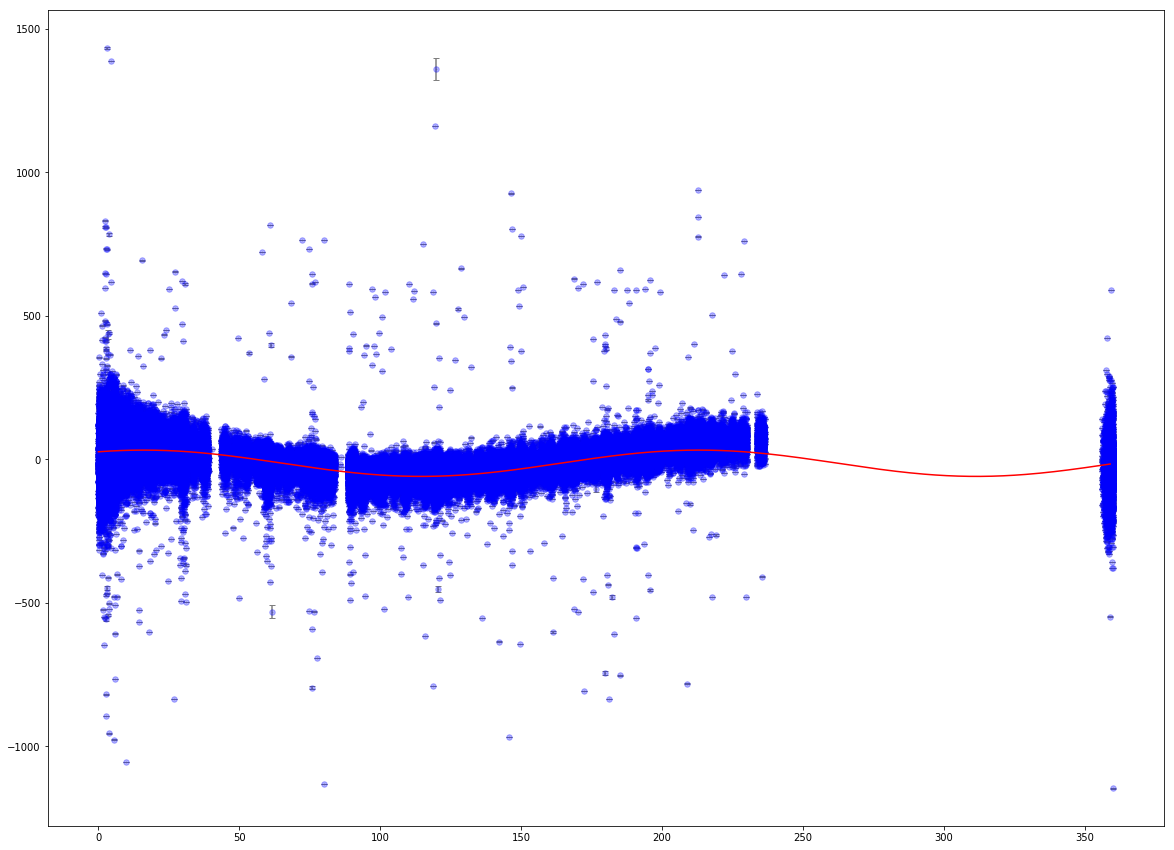

In [8]:
#e fit, GLON vs VHELIO_AVG (VERR)
qe = (star['GLAT'] < 10) &\
    (star['GLAT'] > -10) &\
    (star['GLON'] < 9999) &\
    (star['GLON']>-9990) &\
    (star['VHELIO_AVG']< 9999)&\
    (star['VHELIO_AVG']>-9990)&\
    (star['VERR']< 9999)&\
    (star['VERR']>-9990) 
partemask = np.where(qe)[0]

#fitting
def mcFit4param(function, x3, y3, x3_err, y3_err, guess):
    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 100
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(function, x3_adj, y3_adj, p0=guess)
        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]

popte,pcove = mcFit4param(cosfit, star['GLON'][partemask], star['VHELIO_AVG'][partemask], 0, star['VERR'][partemask], [170, .017, 1.57, 7])
print(popte)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['GLON'][partemask],star['VHELIO_AVG'][partemask],s=30,c='b',alpha=0.3)
ax.errorbar(star['GLON'][partemask],star['VHELIO_AVG'][partemask], yerr=star['VERR'][partemask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)

xdata = np.arange(0,360,1)
plt.plot(xdata, cosfit(xdata, *popte), c='r', label='Original fit')
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


[-15.0, 1.0, -2.0, 55.0]


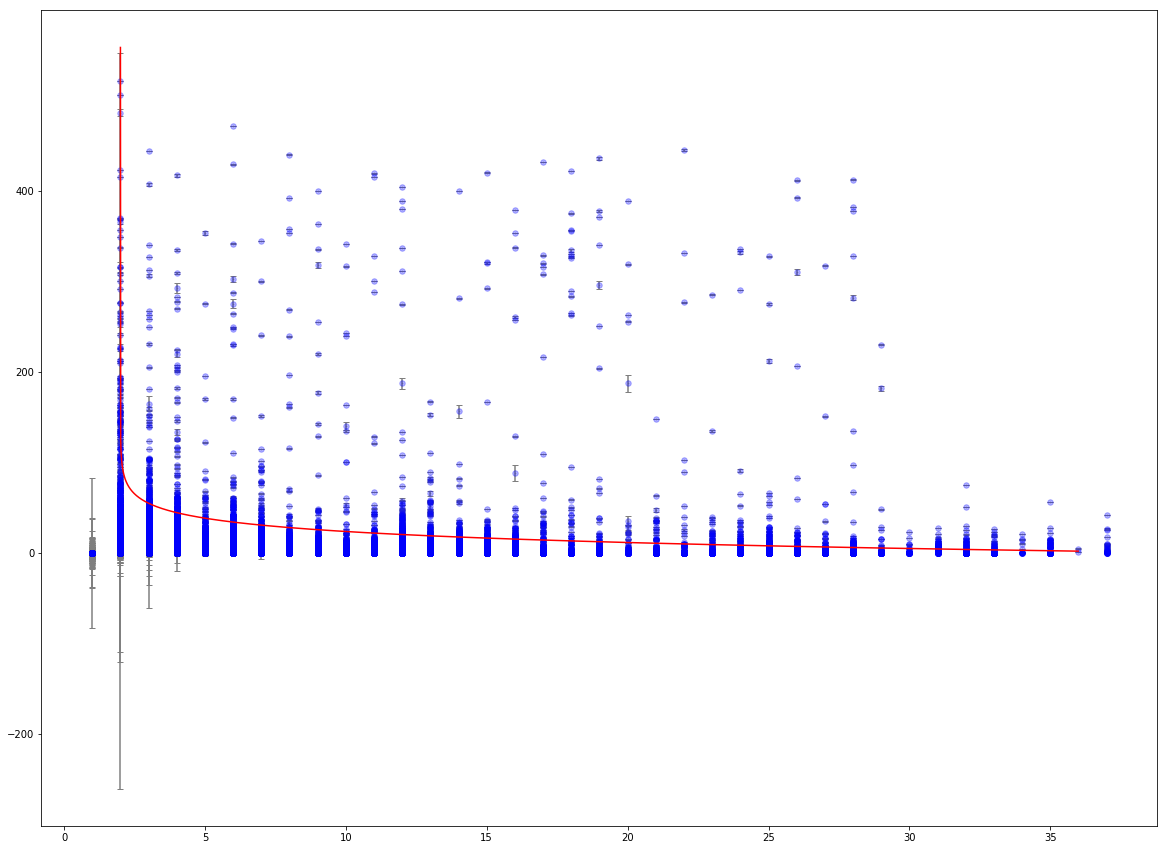

In [14]:
#f fit, NVISITS vs VSCATTER (VERR)
qf = (star['NVISITS'] < 9999) &\
    (star['NVISITS']>-9990) &\
    (star['VSCATTER']< 9999)&\
    (star['VSCATTER']>-9990)&\
    (star['VERR']< 9999)&\
    (star['VERR']>-9990) 
partfmask = np.where(qf)[0]

#fitting
def mcFit4paramf(function, x3, y3, x3_err, y3_err, guess):
    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 100
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(function, x3_adj, y3_adj, p0=guess)
        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]

poptf,pcovf = mcFit4paramf(logfit, star['NVISITS'][partfmask], star['VSCATTER'][partfmask], 0, star['VERR'][partfmask], [-15, 1, -2, 55])
print(poptf)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['NVISITS'][partfmask],star['VSCATTER'][partfmask],s=30,c='b',alpha=0.3)
ax.errorbar(star['NVISITS'][partfmask],star['VSCATTER'][partfmask], yerr=star['VERR'][partfmask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
xdata = np.arange(-1,36,.01)
plt.plot(xdata, logfit(xdata, *poptf), c='r', label='Original fit')
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log


[-0.10000000000000002, 1.0, 2.5, 0.0]
[-0.7875621134060844, -2.2054657739042964]


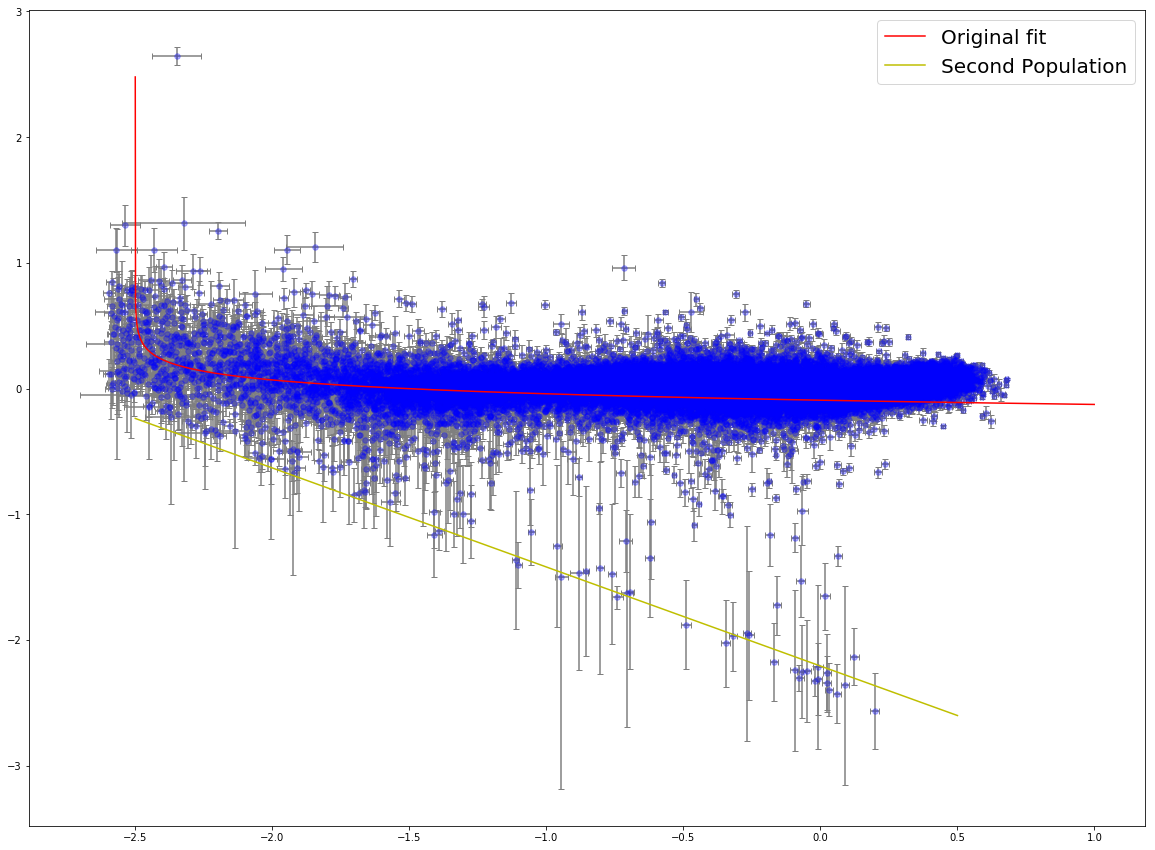

In [132]:
#g fit, Fe_H (Fe_H_ERR) vs NI_FE (NI_FE_ERR)
qg = (star['Fe_H'] < 9999) &\
    (star['Fe_H'] > -9990) &\
    (star['NI_FE'] < 9999) &\
    (star['NI_FE']>-9999) &\
    (star['Fe_H_ERR']< 9999)&\
    (star['Fe_H_ERR']>-9990)&\
    (star['NI_FE_ERR']< 9999)&\
    (star['NI_FE_ERR']>-9990)
partgmask = np.where(qg)[0]

qg1 = (star['Fe_H'] < 9999) &\
    (star['Fe_H'] > -9990) &\
    (star['NI_FE'] < -1.5) &\
    (star['NI_FE']>-9990) &\
    (star['Fe_H_ERR']< 9999)&\
    (star['Fe_H_ERR']>-9990)&\
    (star['NI_FE_ERR']< 9999)&\
    (star['NI_FE_ERR']>-9990)
partg1mask = np.where(qg1)[0]

#fitting
def mcFit4paramg(function, x3, y3, x3_err, y3_err, guess):
    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 1000
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(function, x3_adj, y3_adj, p0=guess)
        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]

#first population
poptg,pcovg = mcFit4paramg(logfit, star['Fe_H'][partgmask], star['NI_FE'][partgmask], star['Fe_H_ERR'][partgmask], star['NI_FE_ERR'][partgmask], [-.1, 1, 2.5, 0])
print(poptg)

#second population
def mcFitLineg(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))

        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
    
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

poptg1, pcovg1 = mcFitLineg(star['Fe_H'][partg1mask], star['NI_FE'][partg1mask], star['Fe_H_ERR'][partg1mask], star['NI_FE_ERR'][partg1mask])
print(poptg1)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][partgmask],star['NI_FE'][partgmask],s=30,c='b',alpha=0.3)
ax.errorbar(star['Fe_H'][partgmask],star['NI_FE'][partgmask], xerr=star['Fe_H_ERR'][partgmask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
ax.errorbar(star['Fe_H'][partgmask],star['NI_FE'][partgmask], yerr=star['NI_FE_ERR'][partgmask], c='tab:gray', fmt='.', markersize=1, capsize=3, zorder=0)
xdata = np.arange(-16.5,1,.001)
plt.plot(xdata, logfit(xdata, *poptg), c='r', label='Original fit')
xdata = np.arange(-2.5, 1.5, 1)
plt.plot(xdata, linear(xdata, *poptg1), c='y', label='Second Population')
plt.legend(loc='best', fontsize=20)
plt.show()